Import Module

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Loaded Dataset

In [ ]:
dataset_wine = pd.read_csv('winequality.csv')
dataset_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dataset_wine.shape

(1599, 12)

Split data - menghapus data dari kolom quality

In [ ]:
dataset_wine = dataset_wine.drop('quality', axis = 1)
dataset_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

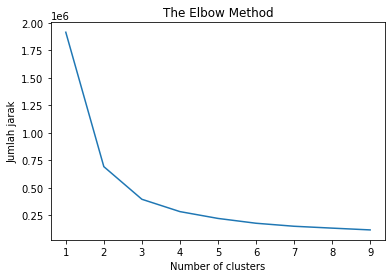

In [ ]:
# initial dalam data array
wss = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(dataset_wine)
  wss.append(kmeans.inertia_)
plt.plot(range(1,10), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Jumlah jarak')
plt.show()

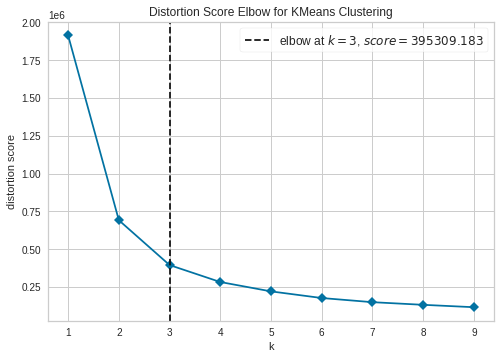

In [ ]:
from  yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(dataset_wine)
visualizer.show()

In [ ]:
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(dataset_wine)
  score = silhouette_score(dataset_wine, kmeans.labels_)
  print("For Cluster: {}, the solhouette score is: {}".format(i, score))

For Cluster: 2, the solhouette score is: 0.6034220347331241
For Cluster: 3, the solhouette score is: 0.5209115257258505
For Cluster: 4, the solhouette score is: 0.48545959739918065
For Cluster: 5, the solhouette score is: 0.44642187844374576
For Cluster: 6, the solhouette score is: 0.44654595417824555
For Cluster: 7, the solhouette score is: 0.3940373555812897
For Cluster: 8, the solhouette score is: 0.389074921399487
For Cluster: 9, the solhouette score is: 0.38569783987616935


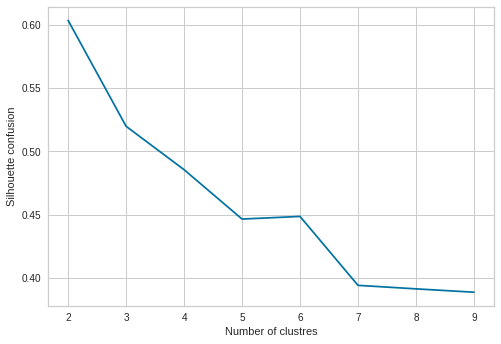

In [ ]:
silhouette_confusion = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(dataset_wine)
  score = silhouette_score(dataset_wine, kmeans.labels_)
  silhouette_confusion.append(score)

plt.plot(range(2,10), silhouette_confusion)
plt.xticks(range(2,10))
plt.xlabel("Number of clustres")
plt.ylabel("Silhouette confusion")
plt.show()

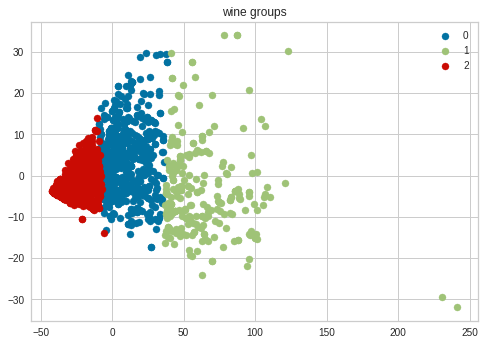

In [ ]:
pca = PCA()
X = pca.fit_transform(dataset_wine)

kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)

for i in unique_labels:
  plt.scatter(X[label==i, 0], X[label==i, 1], label=i, s=50)

plt.legend()
plt.title('wine groups')
plt.show()